In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("metadata.csv",parse_dates=["updated_at","published_at"],squeeze=True)

In [3]:
df.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


## Data Engineering

In [4]:
df.shape

(954501, 6)

In [5]:
df.isnull().sum()

author_id        0
pratilipi_id     0
category_name    0
reading_time     0
updated_at       0
published_at     7
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,author_id,pratilipi_id,reading_time
count,9.544940e+05,9.544940e+05,954494.000000
mean,-2.379595e+15,1.368573e+15,351.980587
std,3.921993e+14,1.160948e+14,513.961101
min,-9.070332e+15,-8.734611e+14,0.000000
25%,-2.270332e+15,1.377786e+15,111.000000
50%,-2.270332e+15,1.377786e+15,256.000000
75%,-2.270332e+15,1.377786e+15,461.000000
max,-2.270332e+15,1.377786e+15,78983.000000


In [8]:
print("Number of category_name:",df["category_name"].nunique())

Number of category_name: 45


In [9]:
print("Number of author_id:",df["author_id"].nunique())
print("Number of pratilipi_id:",df["pratilipi_id"].nunique())

Number of author_id: 64899
Number of pratilipi_id: 486689


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'translation'),
  Text(1, 0, 'relegion-and-spiritual'),
  Text(2, 0, 'crime'),
  Text(3, 0, 'erotica'),
  Text(4, 0, 'novels'),
  Text(5, 0, 'action-and-adventure'),
  Text(6, 0, 'krishi-jeevan'),
  Text(7, 0, 'crime-lekhan'),
  Text(8, 0, 'detective'),
  Text(9, 0, 'life'),
  Text(10, 0, 'The-Chat-Story'),
  Text(11, 0, 'Indiawale'),
  Text(12, 0, 'drama'),
  Text(13, 0, 'Parytan'),
  Text(14, 0, 'family'),
  Text(15, 0, 'mythology'),
  Text(16, 0, 'Pratilipi-Awards-Hindi'),
  Text(17, 0, 'Pratilipi-kalamkar-samman'),
  Text(18, 0, 'pratilipi-kids'),
  Text(19, 0, 'pravasi-sahitya'),
  Text(20, 0, 'romance'),
  Text(21, 0, 'premkamahina'),
  Text(22, 0, 'moral-inspiring'),
  Text(23, 0, 'fantasy'),
  Text(24, 0, 'children'),
  Text(25, 0, 'entertainment'),
  Text(26, 0,

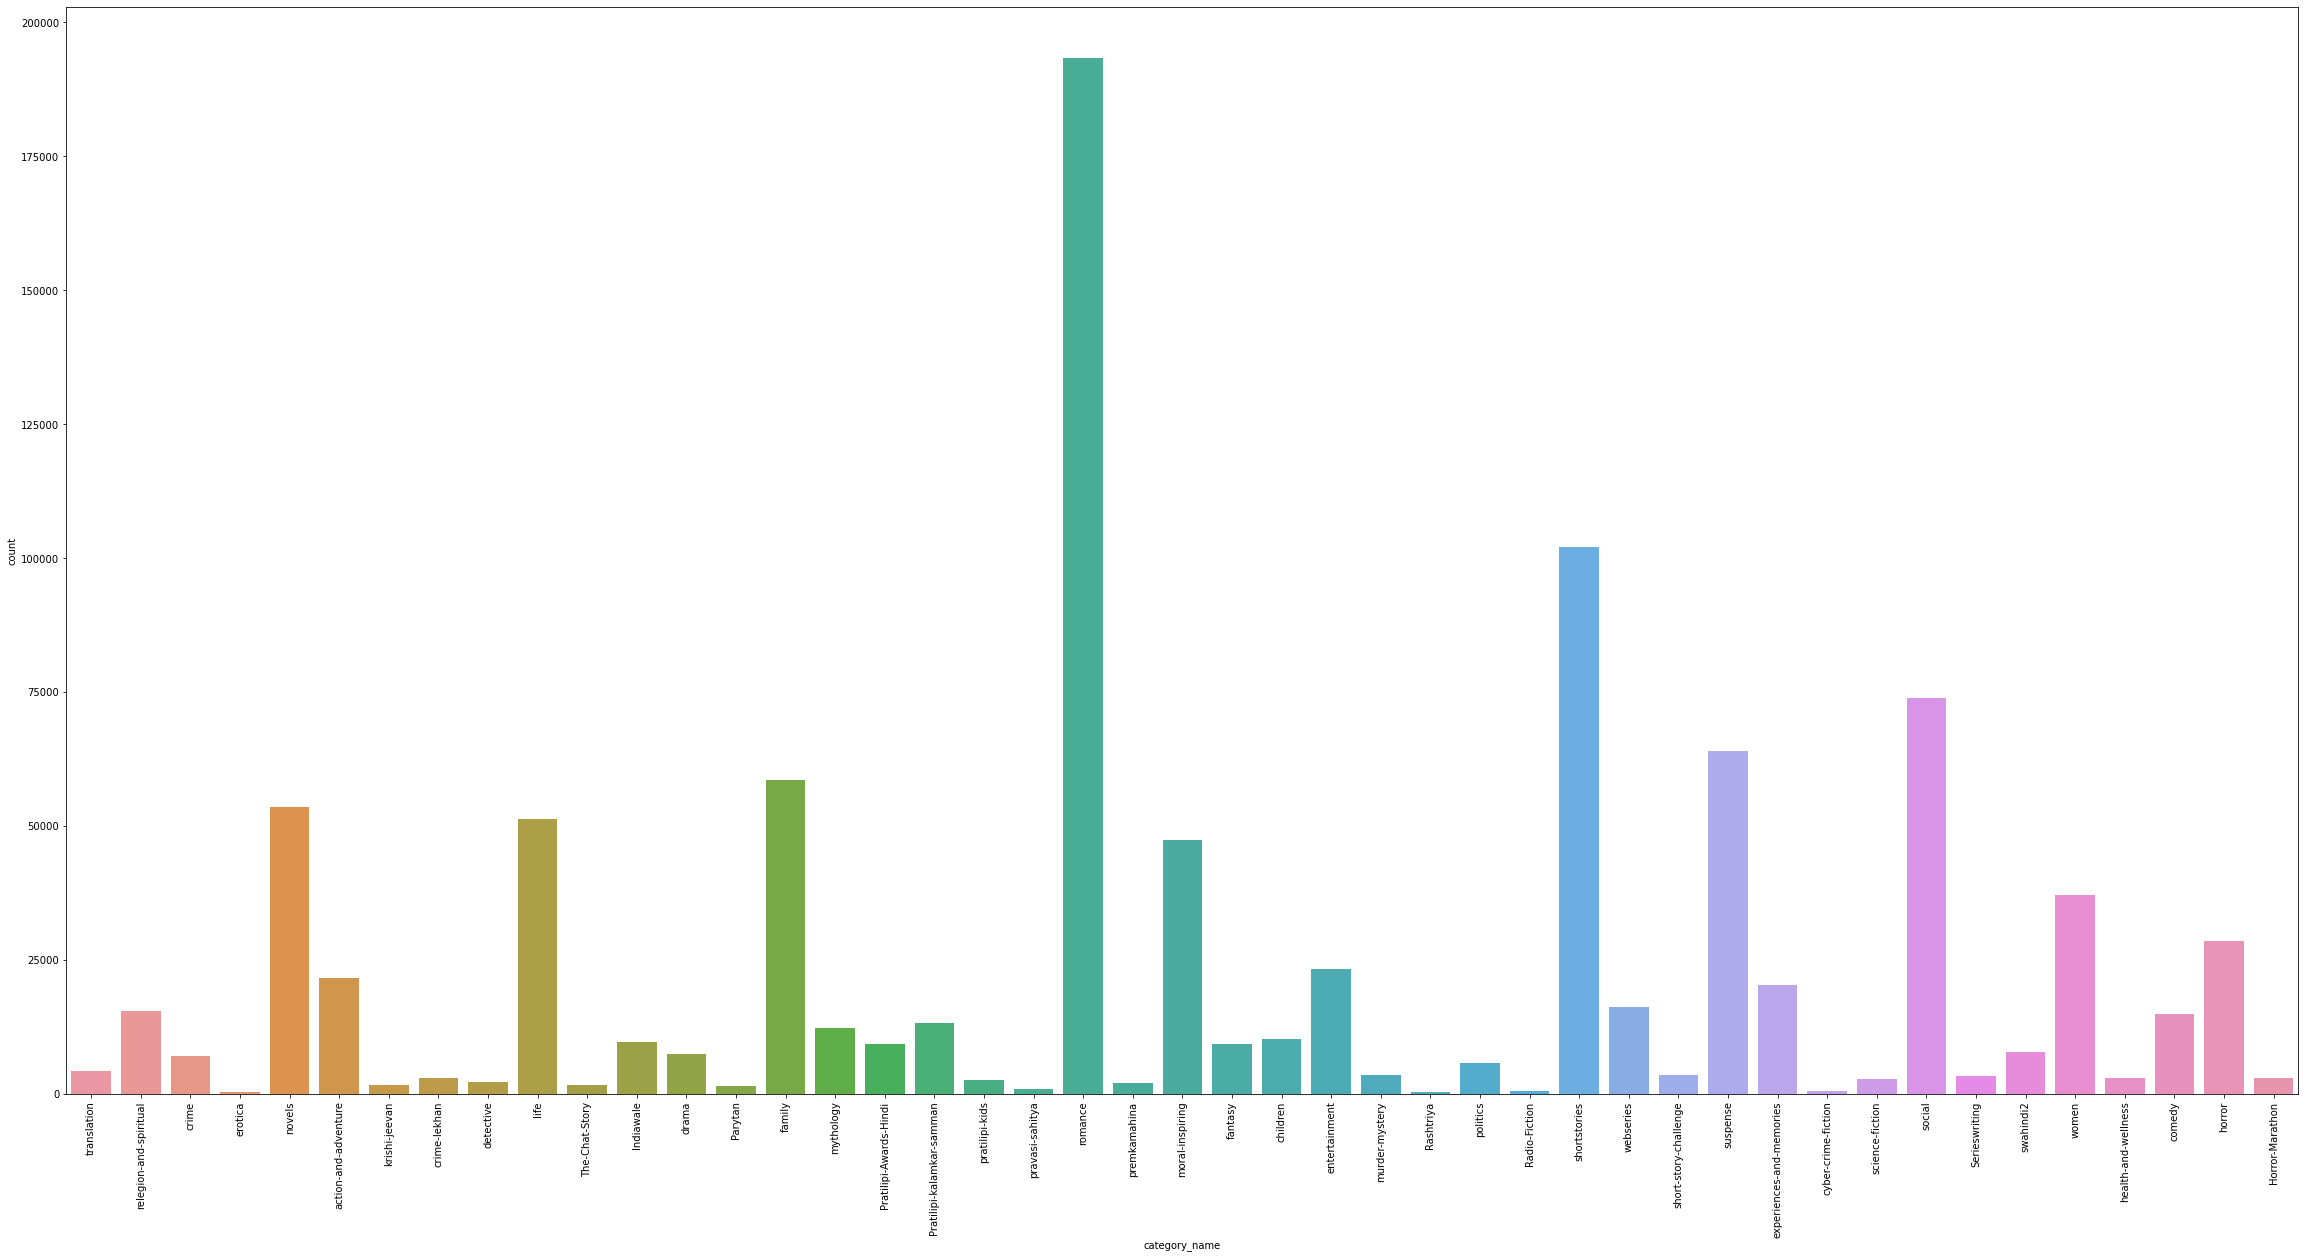

In [10]:
plt.figure(figsize=(40,20))
sns.countplot(df["category_name"])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'reading precentage section')

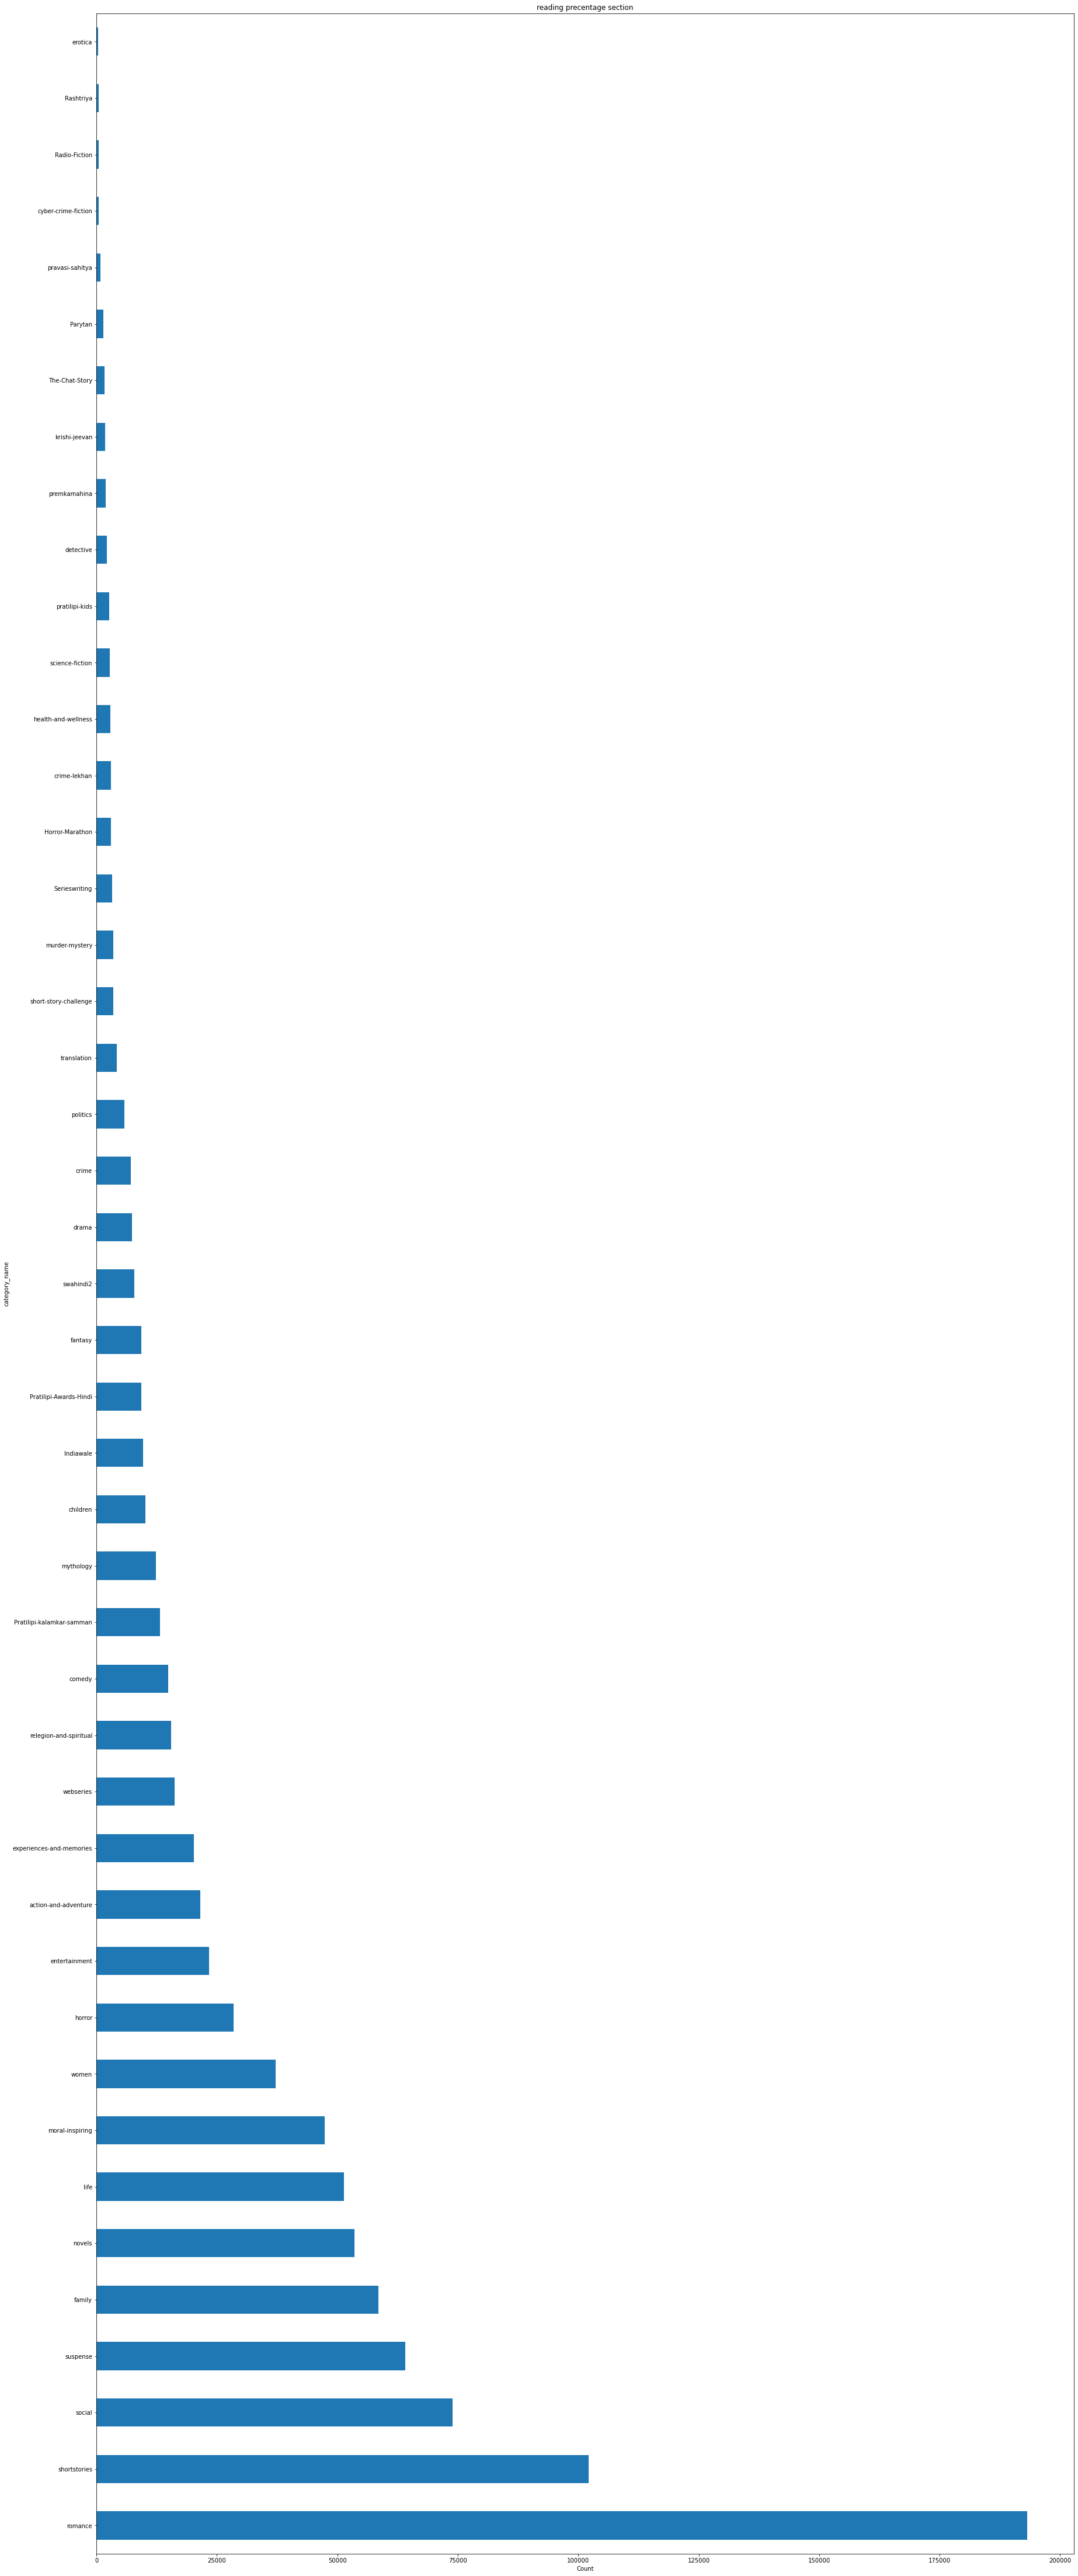

In [11]:
df["category_name"].value_counts().plot(kind="barh",figsize=(30,80))
plt.xlabel("Count")
plt.ylabel("category_name")
plt.title("reading precentage section")

In [12]:
average_user = df.groupby('updated_at').mean()['reading_time']
average_user.head()

updated_at
2018-08-17 10:28:18     65.321875
2018-08-18 01:40:03    155.000000
2018-08-19 01:21:59      1.000000
2018-08-19 01:31:18     27.000000
2018-08-19 01:54:25    178.000000
Name: reading_time, dtype: float64

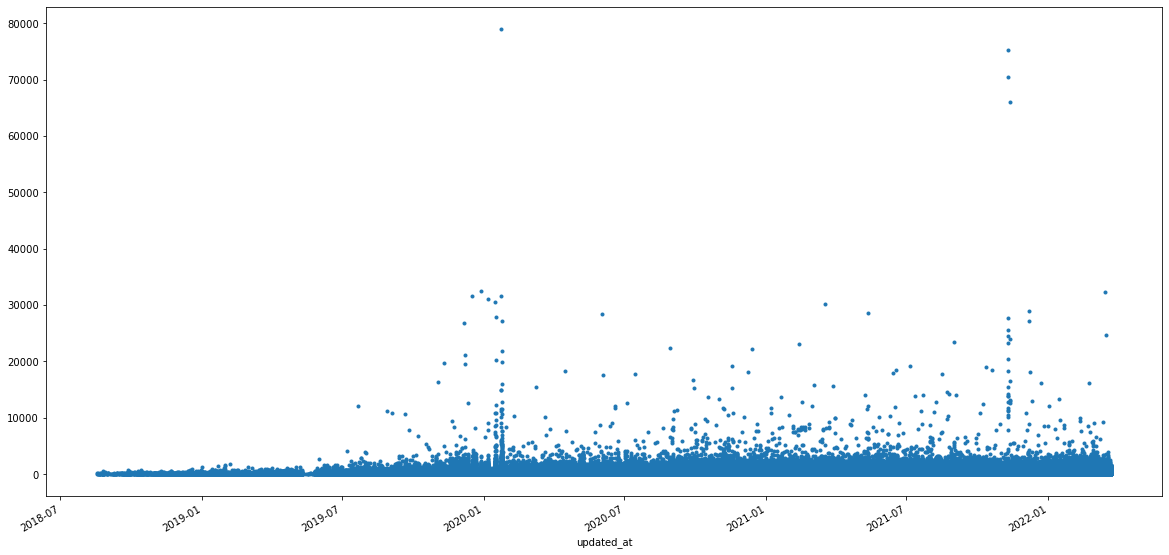

In [13]:
average_user.plot(style='.', figsize=(20,10));

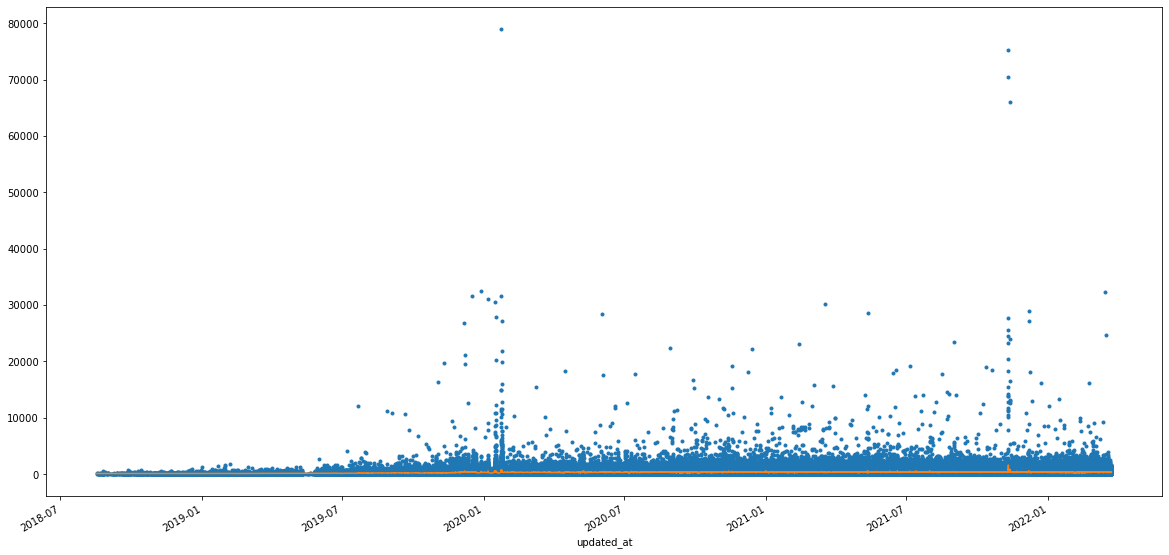

In [14]:
moving_avg = average_user.rolling(window=365, center=True, min_periods=183).mean()
average_user.plot(style='.', figsize=(20,10));
moving_avg.plot();

## Frequent Users

##### Top 5 pratilipi_ids to be read later by users 

In [15]:
freq_user=df.groupby("pratilipi_id")["reading_time"].max()
freq_user.sort_values(ascending=False)

pratilipi_id
 1300795932448456    78983
 291449283974856     75166
 940266639496904     70443
 1090208461919944    69991
-466587479271736     65959
                     ...  
 1377786225715713        0
 1377786225715618        0
 1377786227963879        0
 1377786216898070        0
 1377786216736989        0
Name: reading_time, Length: 486689, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954494 entries, 0 to 954500
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   author_id      954494 non-null  int64         
 1   pratilipi_id   954494 non-null  int64         
 2   category_name  954494 non-null  object        
 3   reading_time   954494 non-null  int64         
 4   updated_at     954494 non-null  datetime64[ns]
 5   published_at   954494 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 83.2+ MB


In [17]:
df=df.set_index(["updated_at"]) # Changing upadted_at as index
df.head()

,author_id,pratilipi_id,category_name,reading_time,published_at
updated_at,,,,,
2020-08-19 15:26:13,-3418949279741297,1025741862639304,translation,0,2016-09-30 10:37:04
2021-01-21 16:27:07,-2270332351871840,1377786215601277,translation,171,2018-06-11 13:17:48
2020-09-29 12:33:57,-2270332352037261,1377786215601962,translation,92,2018-06-12 04:19:12
2019-10-17 09:03:37,-2270332352521845,1377786215640994,translation,0,2019-09-26 14:58:53
2020-05-05 11:33:41,-2270332349665658,1377786215931338,translation,47,2018-11-25 12:28:23


In [18]:
df.drop("author_id",axis=1,inplace=True)
# df.drop("reading_time",axis=1,inplace=True)
df.drop("published_at",axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 954494 entries, 2020-08-19 15:26:13 to 2022-03-23 10:52:43
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   pratilipi_id   954494 non-null  int64 
 1   category_name  954494 non-null  object
 2   reading_time   954494 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 29.1+ MB


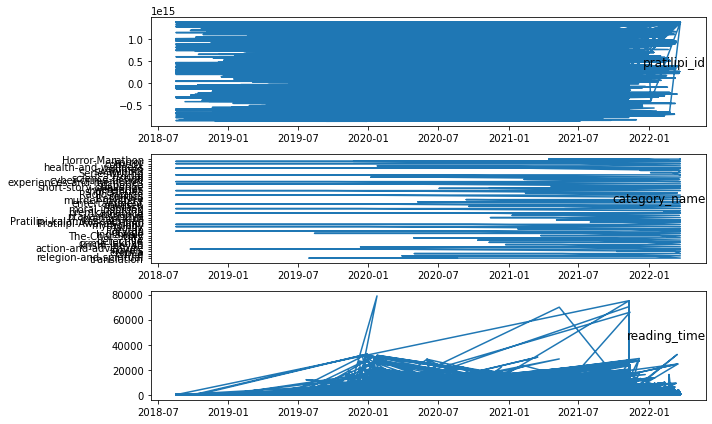

In [20]:
no_cols = len(df.columns)

index = 1

plt.figure(figsize=(10,6))
for column in df.columns:
    plt.subplot(no_cols,1,index)
    plt.plot(df[column])
    plt.title(column , loc="right",y=0.5)
    index+=1
    plt.tight_layout()
plt.show()

# Encoding

In [21]:
df["category_name"]=pd.get_dummies(df["category_name"]).astype("int")  

In [22]:
df.tail()

,pratilipi_id,category_name,reading_time
updated_at,,,
2022-03-22 17:40:22,1377786228358627,1,304
2022-03-22 11:44:39,1377786228362002,1,588
2022-03-22 12:39:41,1377786228362682,1,359
2022-03-23 15:55:11,1377786228375726,1,310
2022-03-23 10:52:43,1377786228376825,1,534


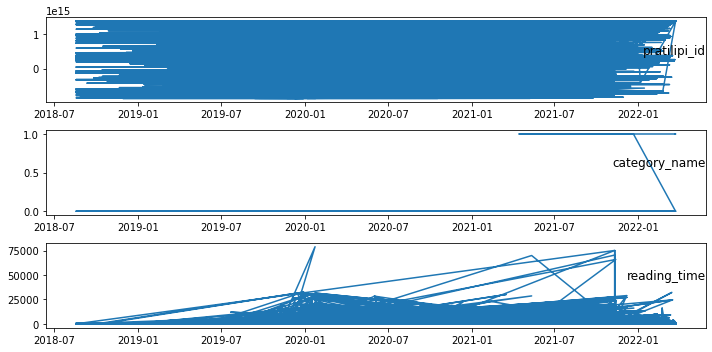

In [23]:
no_cols = len(df.columns)


index = 1

plt.figure(figsize=(10,5))
for column in df.columns:
    plt.subplot(no_cols,1,index)
    plt.plot(df[column])
    
    plt.title(column , loc="right",y=0.5)
    index+=1
    plt.tight_layout()
plt.show()

## Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_transformed = scaler.fit_transform(df)
print(df_transformed)

[[0.84362253 0.         0.        ]
 [0.99999999 0.         0.00216502]
 [0.99999999 0.         0.00116481]
 ...
 [1.         1.         0.00454528]
 [1.         1.         0.0039249 ]
 [1.         1.         0.00676095]]


## Splitting

In [25]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_transformed,test_size=0.25,shuffle=False)

# Modeling

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features=3

generatorTrain = TimeseriesGenerator(train,train,length=n_input,batch_size=1)
generatorTest = TimeseriesGenerator(test,test,length=n_input,batch_size=1)


In [27]:
batch_0 = generatorTrain[0]
x,y = batch_0


print(x,y)

[[[0.84362253 0.         0.        ]
  [0.99999999 0.         0.00216502]
  [0.99999999 0.         0.00116481]]] [[0.99999999 0.         0.        ]]


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [29]:
n_epochs = 10

model = Sequential()
model.add(LSTM(64,activation="tanh",input_shape=(n_input,n_features)))
model.add(Dense(n_features))
model.compile(optimizer="adam", loss="mse")
model.fit(generatorTrain, epochs=n_epochs, batch_size=512, shuffle=False)

Epoch 1/10
715867/715867 [==============================] - 1631s 2ms/step - loss: 8.4753e-05
Epoch 2/10
715867/715867 [==============================] - 1516s 2ms/step - loss: 8.8544e-05
Epoch 3/10
715867/715867 [==============================] - 1226s 2ms/step - loss: 4.1314e-05
Epoch 4/10
715867/715867 [==============================] - 1141s 2ms/step - loss: 2.9747e-05
Epoch 5/10
715867/715867 [==============================] - 979s 1ms/step - loss: 2.7278e-05
Epoch 6/10
715867/715867 [==============================] - 1366s 2ms/step - loss: 2.6048e-05
Epoch 7/10
715867/715867 [==============================] - 1359s 2ms/step - loss: 2.5048e-05
Epoch 8/10
715867/715867 [==============================] - 1380s 2ms/step - loss: 2.4256e-05
Epoch 9/10
715867/715867 [==============================] - 995s 1ms/step - loss: 2.3648e-05
Epoch 10/10
715867/715867 [==============================] - 1345s 2ms/step - loss: 2.3224e-05


#  Prediction

In [ ]:
predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch_rmv_first = current_batch[:,1:,:]
    current_batch = np.append(current_batch_rmv_first,[[current_pred]],axis=1)
    

1/1 [==============================] - 0s 53ms/step


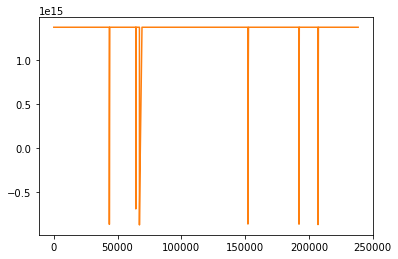

In [40]:
predictions_actual_scale = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

plt.plot(predictions_actual_scale[:,0])
plt.plot(test_data_actual_scale[:,0])